**Name:** Raghul S\
**Reg.No:** 20BCE0915\
**Campus:** VIT Vellore\
**Email:** raghul.s2020@vitstudent.ac.in

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3.1 Univariate Analysis

### Histogram

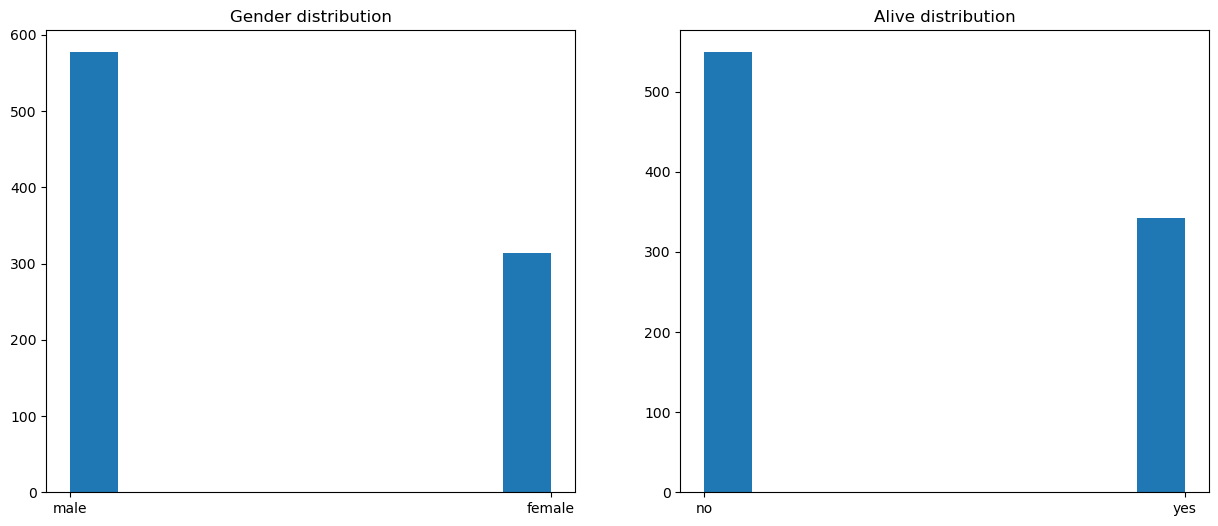

In [4]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(data['sex'])
plt.title('Gender distribution')

plt.subplot(1, 2, 2)
plt.hist(data['alive'])
plt.title('Alive distribution')

plt.show()

### Pie chart

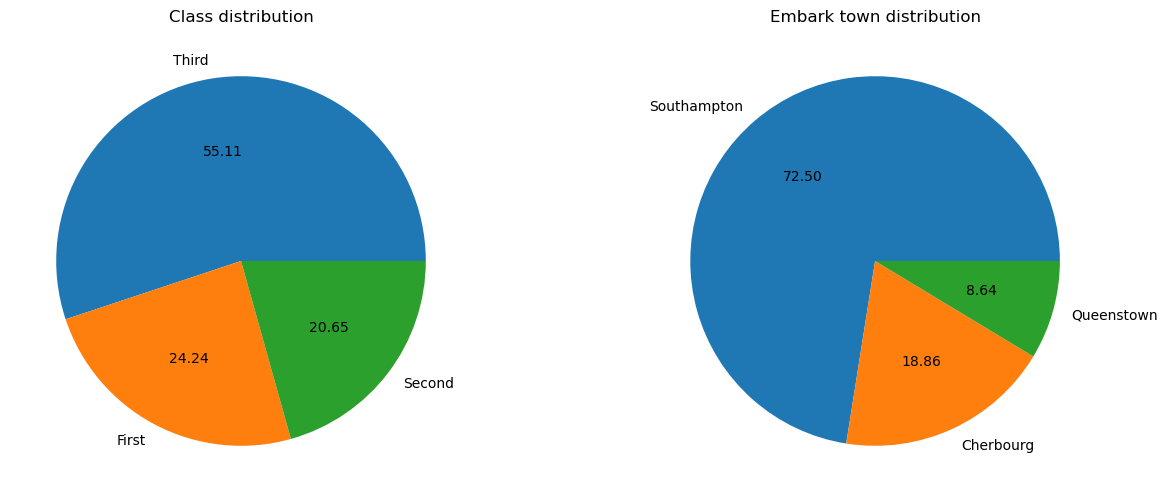

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(data['class'].value_counts(),autopct='%.2f', labels = data['class'].unique())
plt.title('Class distribution')

plt.subplot(1, 2, 2)
data['embark_town'].fillna(data['embark_town'].mode().iloc[0],inplace=True)
plt.pie(data['embark_town'].value_counts(),autopct='%.2f', labels = data['embark_town'].unique())
plt.title('Embark town distribution')

plt.show()

### Box plot

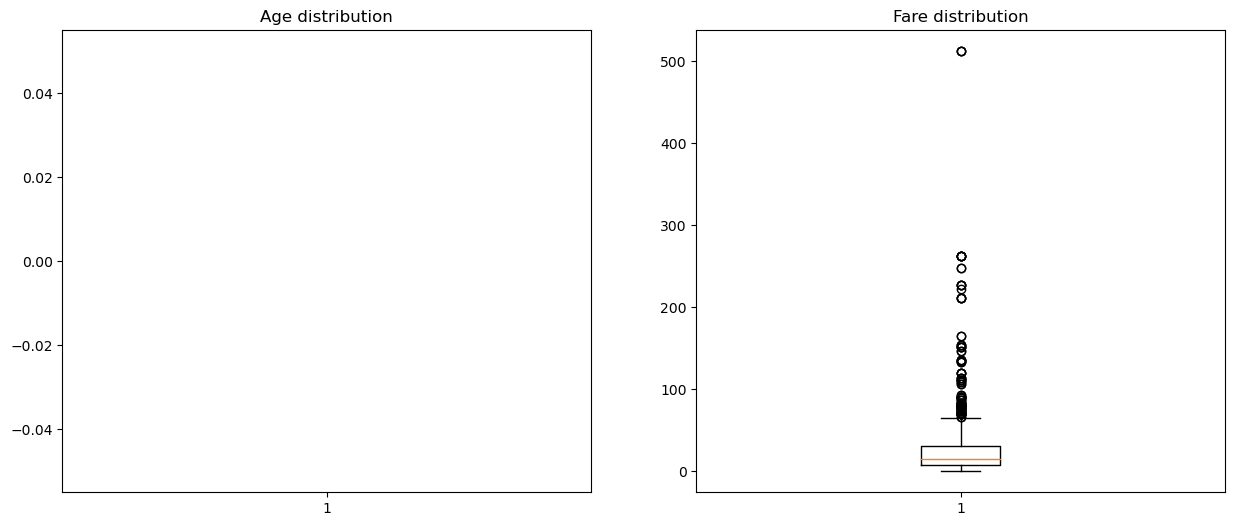

In [6]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(data['age'])
plt.title('Age distribution')

plt.subplot(1, 2, 2)
plt.boxplot(data['fare'])
plt.title('Fare distribution')

plt.show()

## 3.2 Bi - Variate Analysis

### Scatter plot

<Axes: xlabel='age', ylabel='fare'>

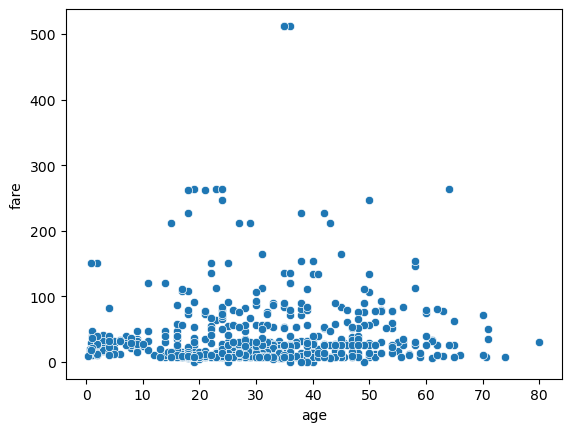

In [7]:
sns.scatterplot(data, x='age', y='fare')

### Bar plot

<Axes: xlabel='age', ylabel='fare'>

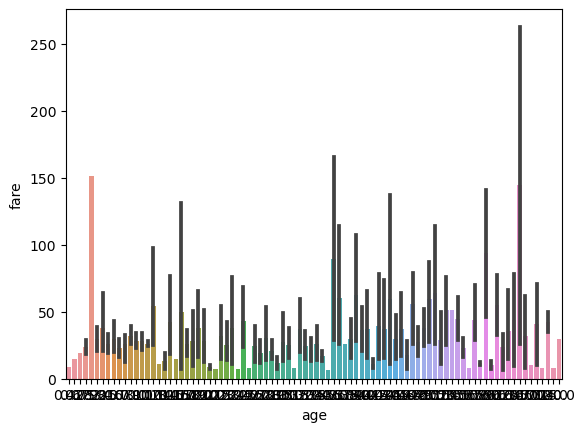

In [8]:
sns.barplot(data, x='age', y='fare')

## 3.3 Multi - Variate Analysis

### Heatmap

C:\Users\user\AppData\Local\Temp\ipykernel_14364\3974116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=data.corr()


<Axes: >

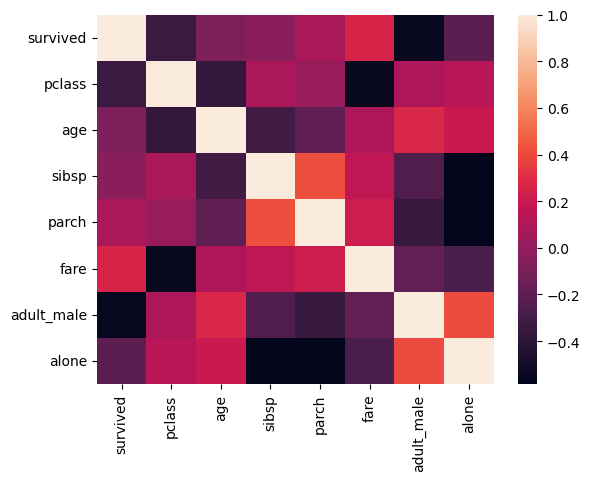

In [9]:
hm=data.corr()
sns.heatmap(hm)

## 4. Performing descriptive statistics on the dataset

In [10]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Handling the Missing values

In [11]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [12]:
data['embarked'].fillna(data['embarked'].mode().iloc[0],inplace=True)

data.dropna(axis=0, inplace=True)

In [13]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 6. Finding the outliers and replace the outliers

In [14]:
# Calculating the IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (data['age'] < Q1 - 1.5 * IQR) | (data['age'] > Q3 + 1.5 * IQR)

# Replacing outliers with median value
data.loc[outliers, 'age'] = data['age'].median()


# Repeating the same process with 'fare'
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['fare'] < Q1 - 1.5 * IQR) | (data['fare'] > Q3 + 1.5 * IQR)
data.loc[outliers, 'fare'] = data['fare'].median()

## 7. Checking for Categorical columns and performing encoding

In [15]:
# Check data types of columns
column_types = data.dtypes

# Filter categorical columns
categorical_columns = column_types[column_types == 'object'].index

# categorical column names
print(categorical_columns)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


### Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [19]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True
10,1,3,0,4.0,1,1,16.7000,2,2,0,False,6,2,1,False
11,1,1,0,58.0,0,0,26.5500,2,0,2,False,2,2,1,True


## 8. Splitting the data into dependent and independent variables

In [20]:
# 'Y' is the dependent variable

y = data['alive']

y.head()

1     1
3     1
6     0
10    1
11    1
Name: alive, dtype: int32

In [21]:
# 'X' is the independent variable 

X= data.drop(columns=['alive'],axis=1)

X.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,False
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,False
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,True
10,1,3,0,4.0,1,1,16.7000,2,2,0,False,6,2,False
11,1,1,0,58.0,0,0,26.5500,2,0,2,False,2,2,True


## 9. Scaling the independent variables

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_s = scaler.fit_transform(X)

X_s

array([[1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.16666667, 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.        ,
        1.        ]])

In [23]:
X = pd.DataFrame(X_s, columns = X.columns)

In [24]:
X.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,1.0,0.0,0.0,0.468892,0.333333,0.00,0.432369,0.0,0.0,1.0,0.0,0.333333,0.0,0.0
1,1.0,0.0,0.0,0.430956,0.333333,0.00,0.322078,1.0,0.0,1.0,0.0,0.333333,1.0,0.0
2,0.0,0.0,1.0,0.671219,0.000000,0.00,0.314572,1.0,0.0,0.5,1.0,0.666667,1.0,1.0
3,1.0,1.0,0.0,0.038948,0.333333,0.25,0.101294,1.0,1.0,0.0,0.0,1.000000,1.0,0.0
4,1.0,0.0,0.0,0.721801,0.000000,0.00,0.161039,1.0,0.0,1.0,0.0,0.333333,1.0,1.0


## 10. Splitting the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
8,1.0,0.0,0.0,0.607992,0.333333,0.0,0.465401,0.0,0.0,1.0,0.0,0.500000,0.0,0.0
45,1.0,0.0,0.0,0.367729,0.000000,0.0,0.524666,1.0,0.0,1.0,0.0,0.166667,1.0,1.0
86,0.0,0.0,1.0,0.797673,0.333333,1.0,0.348704,1.0,0.0,0.5,1.0,0.333333,1.0,0.0
44,0.0,0.0,1.0,0.772382,0.000000,0.0,0.161039,1.0,0.0,0.5,1.0,0.333333,1.0,1.0
116,1.0,0.0,1.0,0.443601,0.000000,0.0,0.160054,1.0,0.0,0.5,1.0,0.666667,1.0,1.0


In [28]:
X_test.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
139,1.0,0.0,0.0,0.178048,0.000000,0.25,0.348704,1.0,0.0,0.0,0.0,0.166667,1.0,0.0
106,1.0,0.0,0.0,0.367729,0.000000,0.00,0.567125,1.0,0.0,1.0,0.0,0.166667,1.0,1.0
7,0.0,0.0,1.0,0.228629,1.000000,0.50,0.348704,1.0,0.0,0.5,1.0,0.333333,1.0,0.0
107,1.0,0.0,0.0,0.544765,0.000000,0.25,0.351673,0.0,0.0,1.0,0.0,0.166667,0.0,0.0
60,1.0,0.0,0.0,0.215984,0.666667,0.50,0.348704,0.0,0.0,1.0,0.0,0.166667,0.0,0.0


In [29]:
y_train

52     1
257    1
438    0
252    0
572    1
      ..
512    1
332    0
577    1
263    0
823    1
Name: alive, Length: 147, dtype: int32

In [30]:
y_test

689    1
520    1
27     0
523    1
311    1
487    0
318    1
789    0
194    1
809    1
779    1
341    1
21     1
556    1
724    1
710    1
102    0
331    0
717    1
366    1
796    1
763    1
305    1
835    1
745    0
11     1
297    0
641    1
581    1
599    1
550    1
325    1
544    0
148    0
215    1
659    0
484    1
Name: alive, dtype: int32